# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
from fastai.vision import *

# Transferring files between Google Colab and Google Drive.md

**Setting Up**

*   Install PyDrive Module
*   clone the colab_util gist and place colab_util.py to the working directory

https://gist.github.com/yt114/dc5d2fd4437f858bb73e38f0aba362c7

In [24]:
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [26]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 25.4MB/s 


In [0]:
from colab_util import *
drive_handler = GoogleDriveHandler()

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [17]:
!rm -r data
!git clone https://github.com/regak/data.git 

Cloning into 'data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [6]:
path = Path('data/bears')
path.ls()

[PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/black')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/fastai/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['teddys','grizzly','black']

In [20]:
folder = 'black'
file_black = 'urls_black.csv'
dest = path/folder
download_images(path/folder/file_black, dest, max_pics=200, max_workers=0)
!ls data/bears/black

Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.zooportraits.com/wp-content/uploads/2018/05/American-Black-Bear-Ursus-Thibetanus.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
00000000.jpg   00000041.jpg   00000081.jpg  00000121.jpg  00000162.jpg
00000001.png   00000042.jpg   00000082.jpg  00000122.jpg  00000163.jpg
00000002.jpg   00000043.jpg   00000083.JPG  00000123.jpg  00000164.JPG
00000003.jpg   00000044.jpg   00000084.jpg  00000124.jpg  00000165.jpg
00000004.jpg   00000045.jpg   00000085.jpg  00000125.jpg  00000166.jpg
00000005.jpg   00000046.jpg   00000086.jpg  00000126.jpg  00000167.jpg
00000006.jpg   00000047.jpg   00000087.jpg  00000127.jpg  00000168.jpg
00000007.jpg   00000048.jpg   00000088

In [21]:
folder = 'grizzly'
file_grizzly = 'urls_grizzly.csv'
dest = path/folder
download_images(path/folder/file_grizzly, dest, max_pics=200)
!ls data/bears/grizzly

Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
00000000.jpg   00000040.jpg  00000080.jpg   00000120.jpg   00000160.jpg
00000001.jpg   00000041.jpg  00000081.jpg   00000121.jpg   00000161.jpg
00000002.png   00000042.jpg  00000082.jpg   00000122.jpg   00000162.png
00000003.jpg   00000043.jpg  00000083.jpg   00000123.jpg   00000163.jpg
00000004.jpg   00000044.jpg  00000084.jpeg  00000124.jpg   00000164.jpg
00000005.jpg   00000045.jpg  00000085.jpg   00000125.jpg   00000165.jpg
00000006.png   00000046.jpg  00000086.jpg   00000126.png   00000166.jpg
00000007.jpg   00000047.jpg  00000087.jpg   00000127.jpg   00000167.jpg
00000008.jpg   00000048.jpg  00000088.jpg   00000128.jpg   00000168.jpg
00000009.jpg   00000049.jpg  00000089.jpg   00000129.jpg   00000169.jpg
00000010.jp

In [22]:
folder = 'teddys'
file_teddy = 'urls_teddy.csv'
dest = path/folder
download_images(path/folder/file_teddy, dest, max_pics=200)
!ls data/bears/teddys


Error https://www.sendah.com/988-thickbox_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-thickbox_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.offercart.in/wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg HTTPSConnectionPool(host='www.offercart.in', port=443): Max retries exceeded with url: /wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7efd40156898>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
00000000.jpg   00000040.jpg   00000082.jpg   00000122.jpg   00000162.jpg
00000001.jpg   00000041.png   00000083.

Then we can remove any images that can't be opened:

In [23]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000165.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000111.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000112.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000120.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000151.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000177.png'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000180.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000063.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000152.jpg'>
cannot identify image file <_io.BufferedRea

cannot identify image file <_io.BufferedReader name='data/bears/black/00000130.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000178.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000061.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000179.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000128.jpg'>


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [10]:
data.classes

['black', 'grizzly', 'teddys']

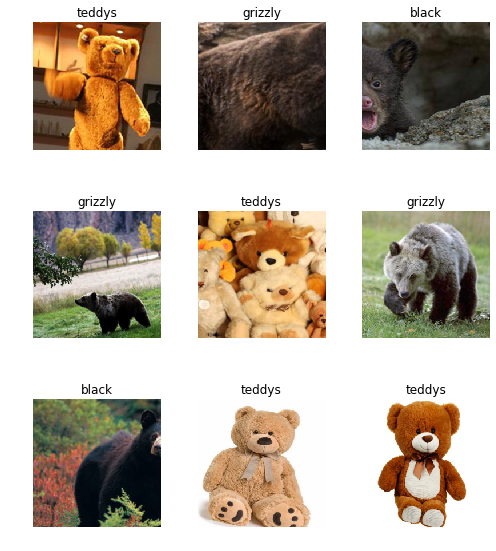

In [51]:
data.show_batch(rows=3, figsize=(7,8))

In [52]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 454, 113)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 84032264.51it/s]


In [14]:
learn.fit_one_cycle(4,1e-3)


epoch,train_loss,valid_loss,error_rate,time
0,1.101152,0.500996,0.185841,00:07
1,0.670772,0.098693,0.026549,00:07
2,0.471329,0.063874,0.017699,00:07
3,0.372858,0.060193,0.017699,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


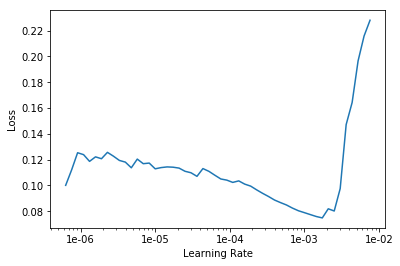

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(4, 7e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.118452,0.090105,0.026549,00:07
1,0.112923,0.395759,0.061947,00:08
2,0.117775,0.077677,0.026549,00:08
3,0.103858,0.017742,0.000000,00:08


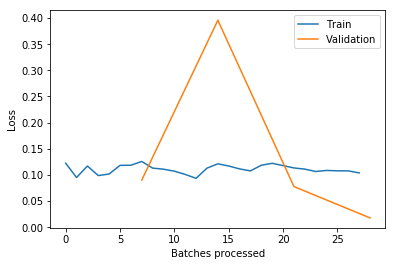

In [58]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

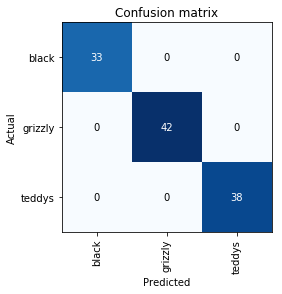

In [62]:
interp.plot_confusion_matrix()

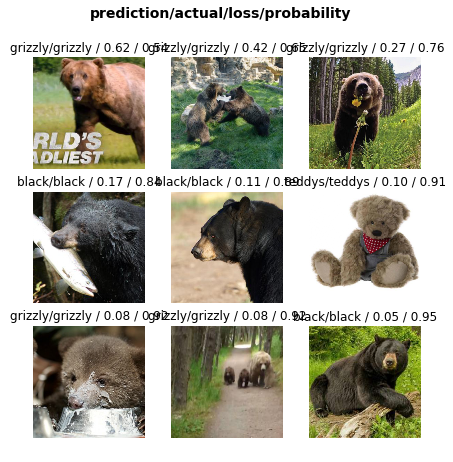

In [92]:
interp.plot_top_losses(9, figsize=(7,7), heatmap=False)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

ImportError: ignored

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

NameError: ignored

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)



ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
ImageRelabeler(ds, idxs)
# or
ImageDeleter(ds, idxs)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, loosing all the results from cleaning the data from toplosses.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

'No images to show :)'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
doc(learn.export)

In [67]:
learn.export('export-2.pkl')
path_export = '/content/data/bears/export-2.pkl'
path_export


'/content/data/bears/export-2.pkl'

Create folder(**bear_models**) and sub folder(**model_one**) in Google drive to store the model.

In [72]:
folder_id = drive_handler.create_folder('bear_models');
subfolder_id = drive_handler.create_folder('model_one', parent_path='bear_models')


bear_models already exists
model_one already exists


Upload the model(**export-2.pkl**) to the subfolder path("**bear_models/model_one**") in google drive.

Then list the files with **drive_handler.list_folder**

In [73]:
drive_handler.upload(path_export, parent_path='bear_models/model_one')


'1W0GyHzpkpqdND2x_ZGLcbeZFucDiZHxe'

In [74]:
drive_handler.list_folder(test_folder_id, max_depth=1)

[{'children': [{'id': '1W0GyHzpkpqdND2x_ZGLcbeZFucDiZHxe',
    'link': 'https://drive.google.com/file/d/1W0GyHzpkpqdND2x_ZGLcbeZFucDiZHxe/view?usp=drivesdk',
    'mimeType': 'application/octet-stream',
    'title': 'export-2.pkl'},
   {'id': '1IcH9W_KY0XaHf2sR8iknVLKXjubddx6J',
    'link': 'https://drive.google.com/file/d/1IcH9W_KY0XaHf2sR8iknVLKXjubddx6J/view?usp=drivesdk',
    'mimeType': 'application/octet-stream',
    'title': 'export.pkl'},
   {'id': '1s-XBqidqjtA83-pdZO-PKA3daYr70ib_',
    'link': 'https://drive.google.com/file/d/1s-XBqidqjtA83-pdZO-PKA3daYr70ib_/view?usp=drivesdk',
    'mimeType': 'application/x-tar',
    'title': 'sample_archive.tar.gz'}],
  'id': '1es3Pk8ilRnM49xAEhTBG3V3md-cb5Uea',
  'link': 'https://drive.google.com/drive/folders/1es3Pk8ilRnM49xAEhTBG3V3md-cb5Uea',
  'mimeType': 'application/vnd.google-apps.folder',
  'title': 'model_one'}]

Deploy your model with Render:https://course.fast.ai/deployment_render.html

My Model: https://alive.onrender.com/

**Read blog:** 
https://medium.com/datadriveninvestor/fastai-and-render-quick-and-easy-way-to-create-and-deploy-computer-vision-models-14fd3f903cfc

# Inference on CPU

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

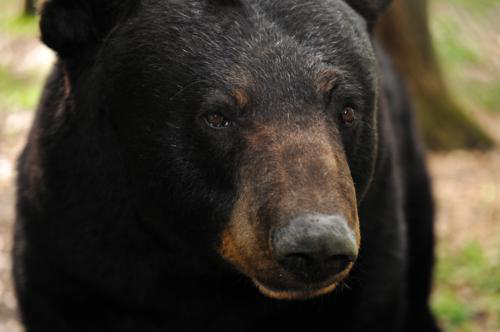

In [76]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [78]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [80]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,16.886942,835434944.000000,0.707965,00:07


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [82]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.339293,1.007035,0.592920,00:07
1,1.299832,1.011523,0.522124,00:08
2,1.274476,1.012374,0.539823,00:08
3,1.266191,1.010533,0.522124,00:08
4,1.270006,1.019308,0.548673,00:09


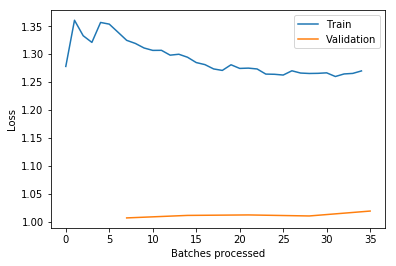

In [83]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [85]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.058412,0.989117,0.407080,00:08


### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [87]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 71299123.17it/s]


In [88]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.265230,1.199697,0.623529,00:09
1,1.262581,1.162572,0.601961,00:05
2,1.206951,1.127525,0.582353,00:05
3,1.160859,1.084966,0.537255,00:05
4,1.121762,1.028155,0.496078,00:05
5,1.072700,0.959704,0.415686,00:05
6,1.016183,0.888929,0.358824,00:05
7,0.960199,0.810826,0.294118,00:05
8,0.896355,0.729193,0.237255,00:06
9,0.840447,0.649567,0.184314,00:06


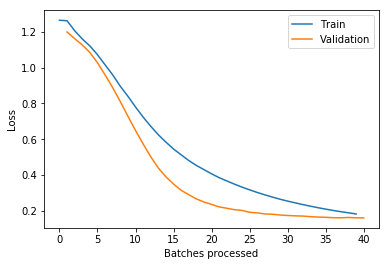

In [89]:
learn.recorder.plot_losses()